Análisis Exploratorio de Series de Tiempo
===

* 34:29 min | Ultima modificación: Marzo 21, 2021 | YouTube

In [1]:
lynx

Time Series:
Start = 1821 
End = 1934 
Frequency = 1 
  [1]  269  321  585  871 1475 2821 3928 5943 4950 2577  523   98  184  279  409
 [16] 2285 2685 3409 1824  409  151   45   68  213  546 1033 2129 2536  957  361
 [31]  377  225  360  731 1638 2725 2871 2119  684  299  236  245  552 1623 3311
 [46] 6721 4254  687  255  473  358  784 1594 1676 2251 1426  756  299  201  229
 [61]  469  736 2042 2811 4431 2511  389   73   39   49   59  188  377 1292 4031
 [76] 3495  587  105  153  387  758 1307 3465 6991 6313 3794 1836  345  382  808
 [91] 1388 2713 3800 3091 2985 3790  674   81   80  108  229  399 1132 2432 3574
[106] 2935 1537  529  485  662 1000 1590 2657 3396

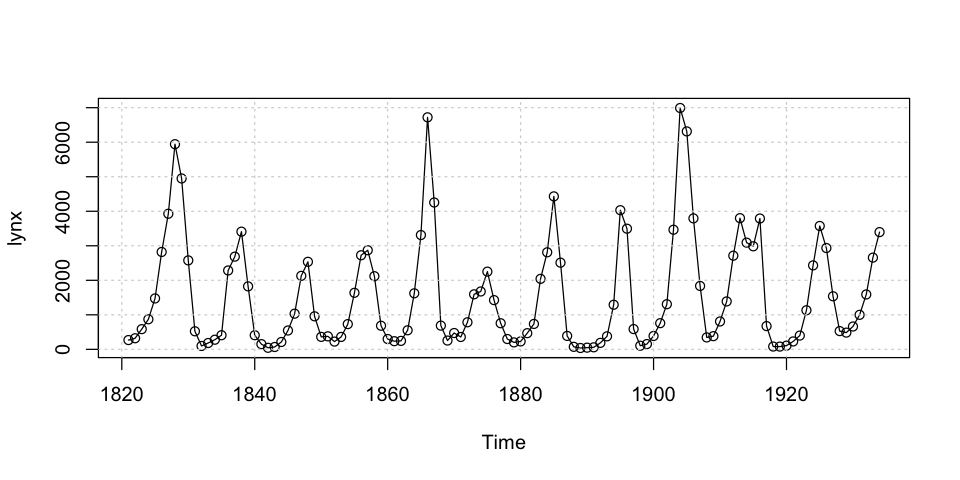

In [6]:
options(repr.plot.width=8, repr.plot.height=4)
plot(lynx, type='o', lwd=1); grid()

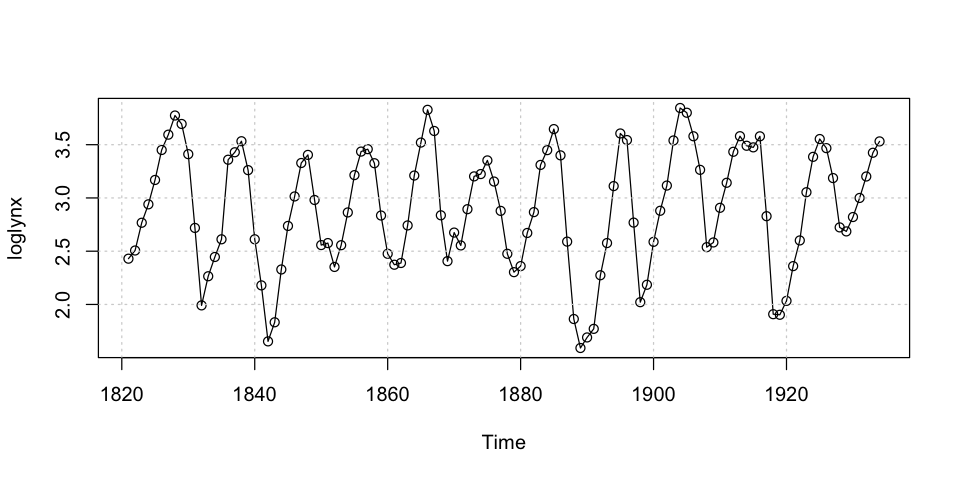

In [10]:
loglynx = log10(lynx)
plot(loglynx, type='o', lwd=1); grid()

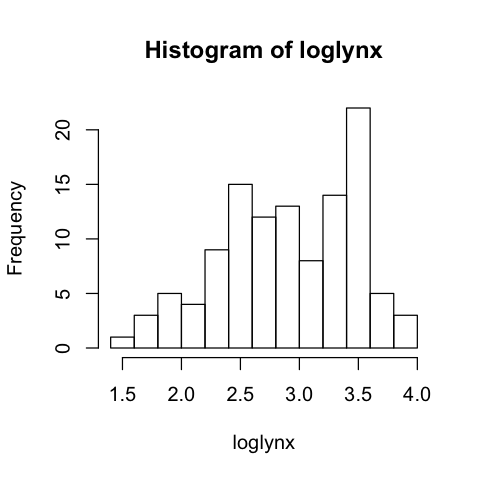

In [14]:
options(repr.plot.width=4, repr.plot.height=4)
hist(loglynx,breaks = 14 )

**Ejercicio.--** ¿Cuáles son los momentos de la distribución del histograma?, ¿máximo?, ¿mínimo?.

**Ejercicio.--** Grafique histogramas 3D para $y_t$ y $y_{t-k}$, con $k=1,...,6$.

In [ ]:
# estimado no parametrico de la E(yt|yt-i)

In [ ]:
# estimado no paramétrico de la varianza

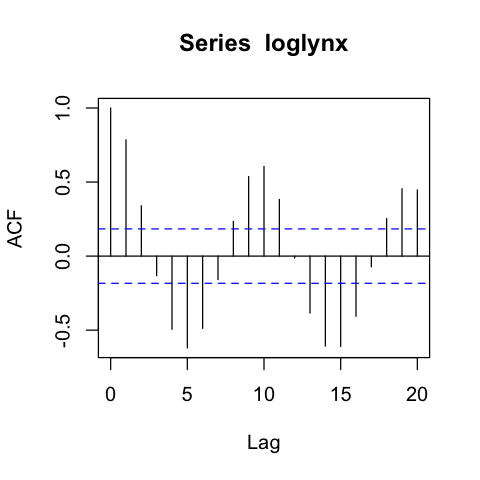

In [15]:
acf(loglynx)

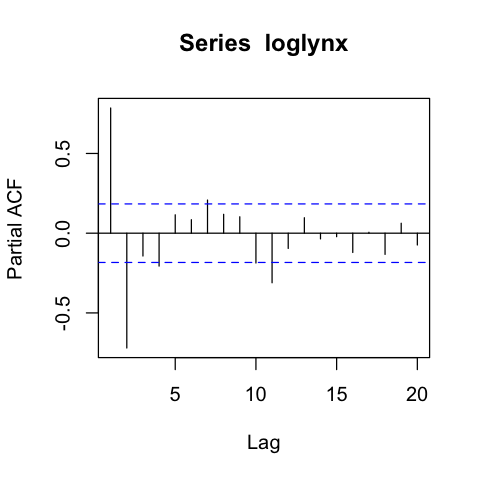

In [16]:
pacf(loglynx)

In [17]:
# tests de no linealidad

In [38]:
# modelo AR preliminar
m = ar(loglynx)

In [46]:
m


Call:
ar(x = loglynx)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.1387  -0.5080   0.2127  -0.2702   0.1127  -0.1240   0.0677  -0.0400  
      9       10       11  
 0.1337   0.1853  -0.3110  

Order selected 11  sigma^2 estimated as  0.04771

In [24]:
str(m)

List of 14
 $ order       : int 11
 $ ar          : num [1:11] 1.139 -0.508 0.213 -0.27 0.113 ...
 $ var.pred    : num 0.0477
 $ x.mean      : num 2.9
 $ aic         : Named num [1:21] 203.7 96.5 15.1 14.8 11.8 ...
  ..- attr(*, "names")= chr [1:21] "0" "1" "2" "3" ...
 $ n.used      : int 114
 $ order.max   : num 20
 $ partialacf  : num [1:20, 1, 1] 0.785 -0.72 -0.143 -0.206 0.115 ...
 $ resid       : Time-Series [1:114] from 1821 to 1934: NA NA NA NA NA NA NA NA NA NA ...
 $ method      : chr "Yule-Walker"
 $ series      : chr "loglynx"
 $ frequency   : num 1
 $ call        : language ar(x = loglynx)
 $ asy.var.coef: num [1:11, 1:11] 0.00886 -0.0106 0.00539 -0.00221 0.00286 ...
 - attr(*, "class")= chr "ar"


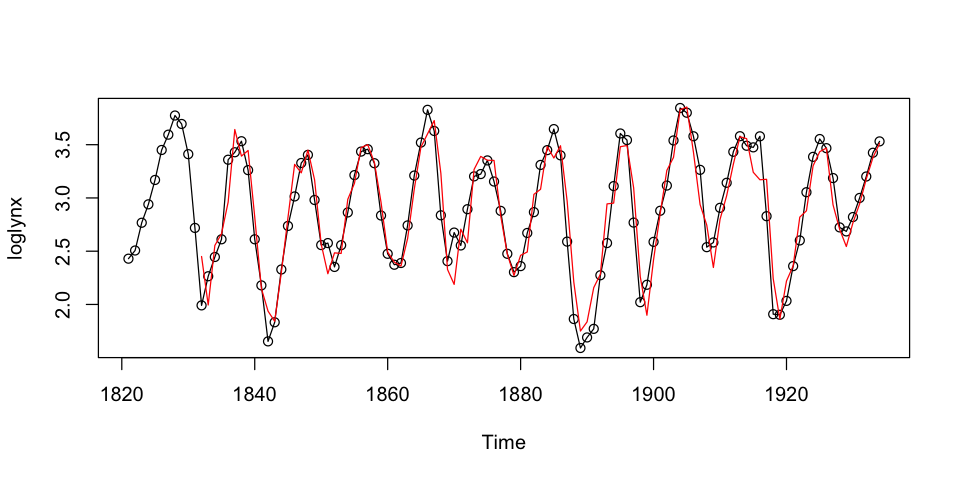

In [44]:
options(repr.plot.width=8, repr.plot.height=4)
plot(loglynx, type='o', lwd=1)
fitted.values = loglynx - m$resid
lines(fitted.values, col='red')

In [53]:
p = predict(m, n.ahead=20)
p

$pred
Time Series:
Start = 1935 
End = 1954 
Frequency = 1 
 [1] 3.430626 3.169258 2.808795 2.484360 2.415530 2.539167 2.742697 2.976807
 [9] 3.172262 3.241279 3.143618 2.926180 2.673458 2.501343 2.509806 2.667712
[17] 2.889915 3.106339 3.244951 3.250264

$se
Time Series:
Start = 1935 
End = 1954 
Frequency = 1 
 [1] 0.2184264 0.3310192 0.3731567 0.3908417 0.3927556 0.3933118 0.3985423
 [8] 0.4069843 0.4140702 0.4153152 0.4210985 0.4319209 0.4352441 0.4353011
[15] 0.4377828 0.4460904 0.4572269 0.4655822 0.4682172 0.4683390


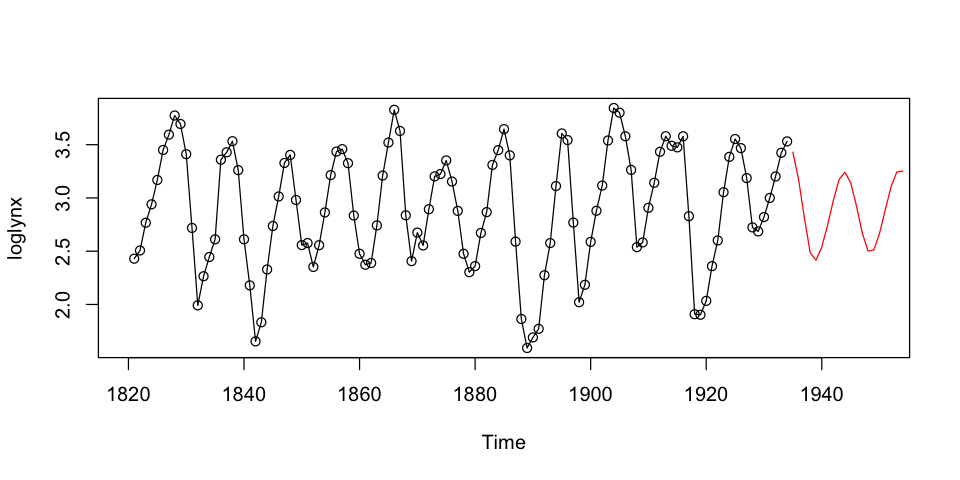

In [54]:
plot(loglynx, type='o', lwd=1, xlim = c(1820, 1950))
lines(p$pred, col='red')

In [32]:
?ar

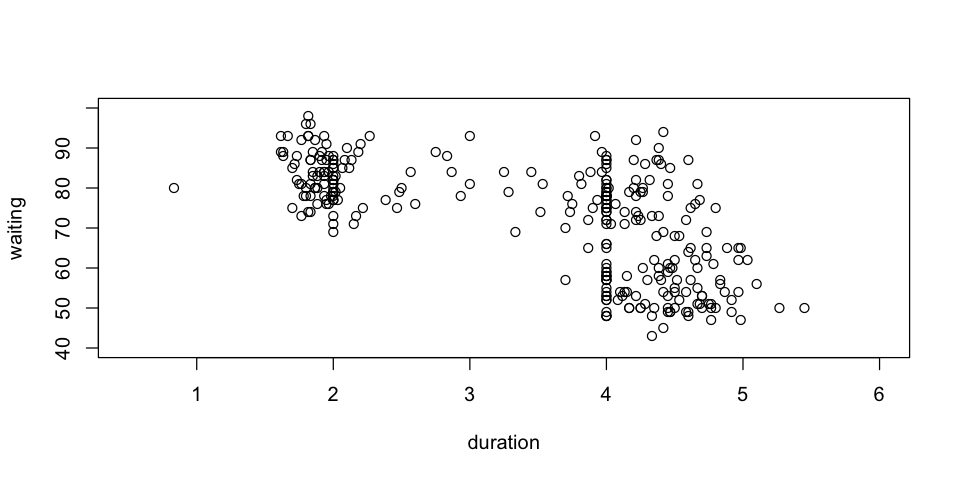

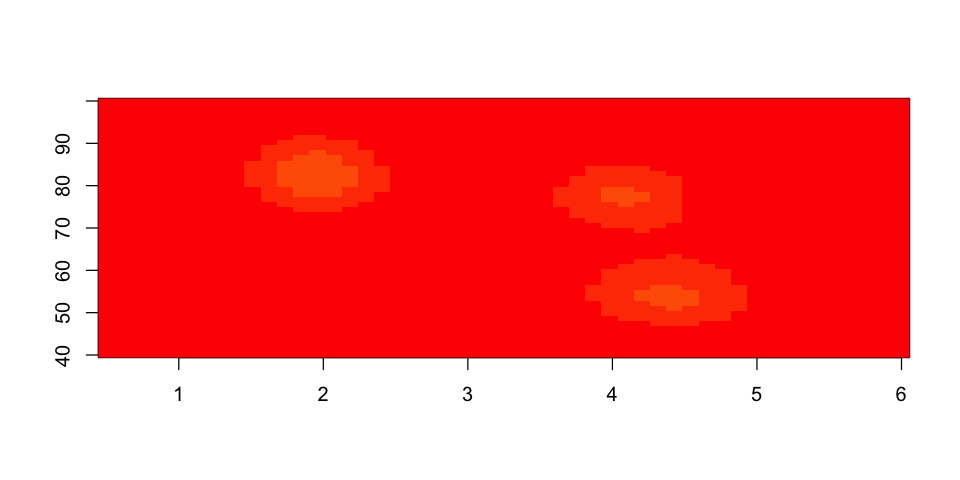

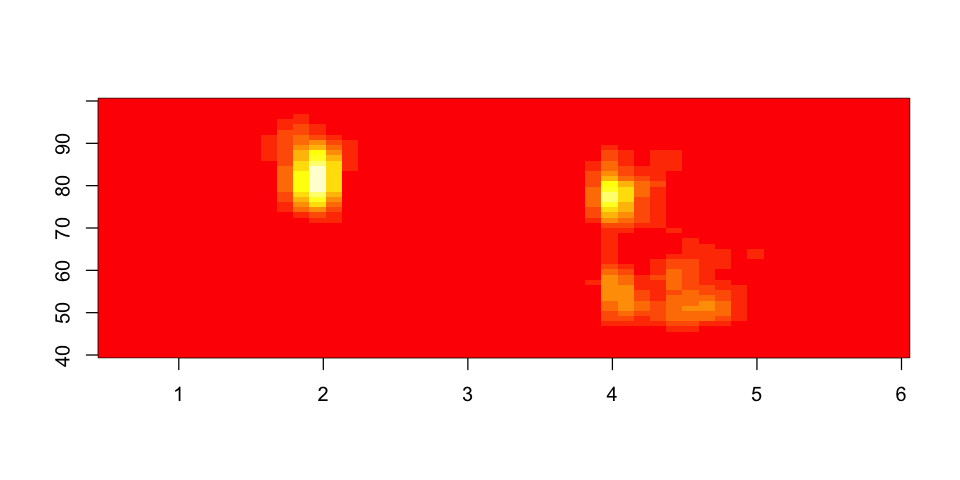

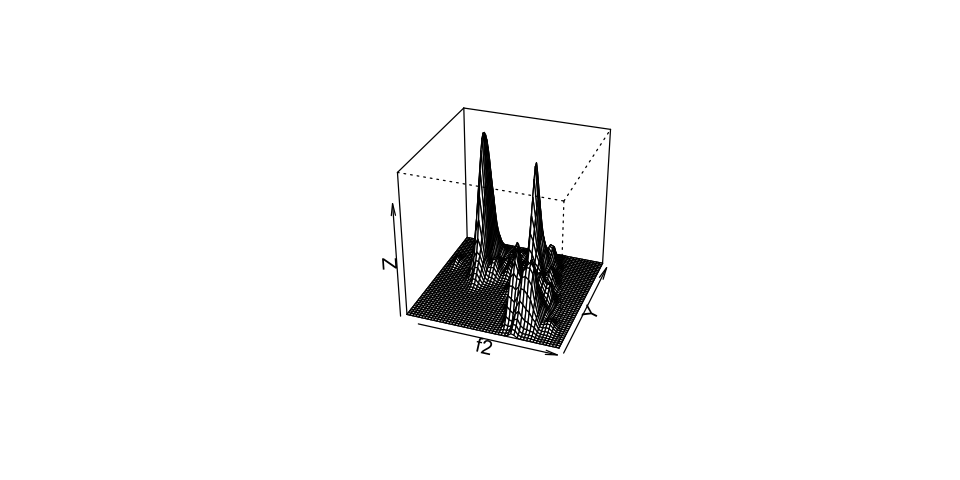

In [56]:
library(MASS)
attach(geyser)
plot(duration, waiting, xlim = c(0.5,6), ylim = c(40,100))
f1 <- kde2d(duration, waiting, n = 50, lims = c(0.5, 6, 40, 100))
image(f1, zlim = c(0, 0.05))
f2 <- kde2d(duration, waiting, n = 50, lims = c(0.5, 6, 40, 100),
            h = c(width.SJ(duration), width.SJ(waiting)) )
image(f2, zlim = c(0, 0.05))
persp(f2, phi = 30, theta = 20, d = 5)